In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from PIL import Image, ImageDraw

%matplotlib widget

save = False
# savePath = "/Users/nguyendat/Documents/GitHub/polar_vortice/polar_vortice/notebooks/Test/planet_1/"

x = np.linspace(0, 1, 200)
y = np.linspace(0, 1, 100).reshape(-1, 1)
xsize, ysize = x.shape[0], y.shape[0]

def lat(pixel,n=ysize): # convert pixel to latitute: ysize
    return (pixel - int(n/2))/n * 180
    
def long(pixel,n=xsize): # convert pixel to longitude: xsize
    return (pixel - int(n/2))/n * 360

### unit: hour, rotational period: 5 hour
def plWave(x, value, w=xsize, f=0, t=0, amplitude=0.4, RP=5): # planetary scale waves
    # create the sine-wave modulation, such that the sine wave looks the same after
    # every rotational period RP
    # w is the spatial period equals to the pixel size
    sine = amplitude*np.sin(2*np.pi/w * (x + (t/RP)*w) + f*np.pi/180)
    # return the original value + sine wave
    return value + sine

coordx, coordy = long(-25), lat(70)

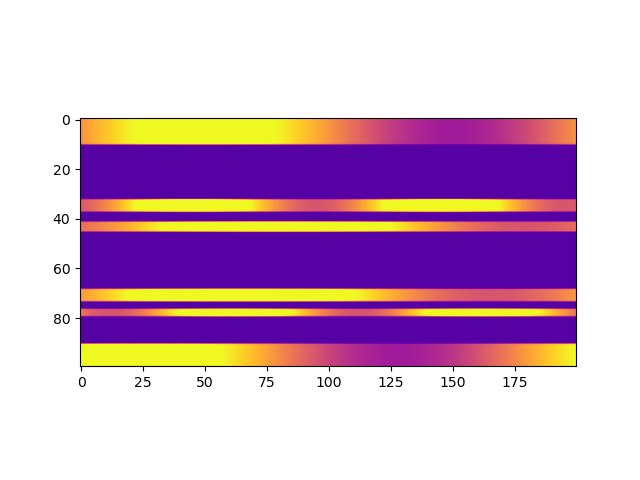

In [ ]:
savePath = "/Users/nguyendat/Documents/GitHub/polar_vortice/polar_vortice/notebooks/Test/planet_2/"
###############################
save = False
# save = True
###############################
# draw_animation = False
draw_animation = True
#### save animation as gif
save_animation = False
save_animation = True
###############################

frame_no = 120
t0, t1 = 0,24

### Initialization
Fband= 0.95
Fambient = 0.15
Fpolar = 0.75
cmap = 'plasma'

### ims is a list of lists, each row is a list of artists to draw in the
### current frame; here we are just animating one artist, the image, in
### each frame
ims = []

### create time_array in hours unit
time_array = np.linspace(t0,t1,frame_no)
fig, ax = plt.subplots()

for i,ti in enumerate(time_array):
    # create empty image of ambient brightness Fambient
    im0 = Fambient*np.ones(shape=(xsize, ysize))
    
    # create banded structure
    for yy in range(ysize):
        for xx in range(xsize):
            
            # generate bands
            if 7 < lat(yy) < 14: im0[xx][yy] = plWave(xx, Fband, f=20, t=ti)
            if 20 < lat(yy) < 30: im0[xx][yy] = plWave(xx, Fband, w=xsize/2, t=ti) 
            if -45 < lat(yy) < -35: im0[xx][yy] = plWave(xx, Fband, f=45, t=ti)
            if -55 < lat(yy) < -50: im0[xx][yy] = plWave(xx, Fband, w=xsize/2, f=-60, t=ti) 
            # polar bands
            if 70 < lat(yy) <= 90: im0[xx][yy] = plWave(xx, Fpolar, t=ti, RP=24) 
            if -90 <= lat(yy) < -75: im0[xx][yy] = plWave(xx, Fpolar, f=40, t=ti, RP=24)
    
    imrot = np.rot90(im0)
    if draw_animation: 
        im = ax.imshow(imrot, vmin=0, vmax=1, animated=True, cmap=cmap)
        if i == 0:
            ax.imshow(imrot, vmin=0, vmax=1, cmap=cmap)   # show an initial one first
    else:
        im = ax.imshow(imrot, vmin=0, vmax=1, cmap=cmap)
    ims.append([im])
    
    if save:
        plt.margins(0, 0), plt.draw(), plt.axis('off')
        fig.savefig(savePath+'ani_%04d.jpeg'%i, format='jpeg', bbox_inches = 'tight', pad_inches=0)
        
### plotting
if draw_animation:
    ani = animation.ArtistAnimation(fig, ims)
    if save_animation:
        ### To save the animation using Pillow as a gif
        writer = animation.PillowWriter(fps=15,
                                        metadata=dict(artist='Me'),
                                        bitrate=1800)
        ani.save(savePath+'ani.gif', writer=writer)
    plt.show()